In [ ]:
#for this GIS code we took code from: https://toarches.medium.com/mapping-coronavirus-b89880ecd400

In [1]:
import csv
import pandas as pd

Below we get the files of all the resources by country and calculate the scores based on the specific resource's effectiveness

In [2]:
with open("Aircraft.csv", encoding = 'cp850') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    aircraft = pd.DataFrame(csv_reader)
headers = aircraft.iloc[0].values
aircraft.columns = headers
aircraft_clean = aircraft.iloc[1:]
aircraft_clean = aircraft_clean.drop(columns = [""])
aircraft_clean = aircraft_clean.apply(lambda s: s.replace("┬á","",regex=True))
aircraft_clean.head()

,Name,Primary Role,Manufacturer,Country
1,143,Medium Bomber,Avions Amiot,France
2,2MB1,Light Bomber,Mitsubishi Heavy Industries,Japan
3,2MR8,Reconnaissance Aircraft,Mitsubishi Heavy Industries,Japan
4,351/354,Medium Bomber,Avions Amiot,France
5,A-17,Ground Attack Aircraft,Northrop Corporation,United States


In [3]:
aircraft_options = ['Other','Prototype Aircraft','Transport',
 'Reconnaissance Aircraft','Glider','Transport','Night Fighter'
,'Biplane Fighter', 'Seaplane','Jet Fighter','Torpedo Bomber', 'Light Bomber','Medium Bomber'
,'Heavy Fighter', 'Dive Bomber', 'Ground Attack Aircraft', 'Fighter',
 'Heavy Bomber']
for i in range(len(aircraft_options)):
    aircraft_clean["Primary Role"] = aircraft_clean["Primary Role"].apply(lambda x: x.replace(aircraft_options[i],str(i)))
aircraft_clean["Primary Role"] = aircraft_clean["Primary Role"].astype(int)
aircraft_clean["aircraft"] = 1
aircraft_added_each = aircraft_clean.groupby("Country")["Primary Role"].sum().reset_index()

In [4]:
with open("facilities.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    facilities = pd.DataFrame(csv_reader)
headers = facilities.iloc[0].values
facilities.columns = headers
facilities_clean = facilities.iloc[1:]
facilities_clean = facilities_clean.drop(columns = [""])
facilities_clean = facilities_clean.apply(lambda s: s.replace("Â","",regex=True))
facilities_clean.head()

,Name,Type,Location,Country
1,AG Vulcan Stettin,Shipyard,"Stettin, Pommern",Germany
2,Alamogordo Army Air Field,Airfield,"Alamogordo, New Mexico",United States
3,Ankang Airfield,Airfield,"Ankang, Shaanxi",China
4,Arlington Hall,Government Building,"Arlington, Virginia",United States
5,Arsenal de Brest,"Shipyard, Naval Port","Brest, Bretagne",France


In [5]:
facilities_clean["Type"] = facilities_clean["Type"].apply(lambda x: x.replace("Naval Port, Shipyard","Shipyard, Naval Port"))

facilities_options = ['Other\xa0','Prison Camp\xa0','Government Building\xa0',
 'Shipyard\xa0','Naval Port\xa0','Factory\xa0','Airfield\xa0','Airfield, 14',
'Army Base\xa0', 'Fortification\xa0','Airfield, 5','Military Headquarters\xa0','Airfield, 4','Factory, 3', 'Shipyard, 4' ,'Prison Camp, 5'
,'Government Building, 1', 'Airfield, Naval Port, Shipyard\xa0', 'Airfield, Army Base, Naval Port, Shipyard\xa0']

for i in range(len(facilities_options)-2):
    facilities_clean["Type"] = facilities_clean["Type"].apply(lambda x: x.replace(facilities_options[i],str(i)))
facilities_clean["Type"] = facilities_clean["Type"].apply(lambda x: x.replace('Airfield, Army Base, Naval Port, Shipyard\xa0','18'))
facilities_clean["Type"] = facilities_clean["Type"].apply(lambda x: x.replace('Army Base, 1','10'))
facilities_clean["Type"] = facilities_clean["Type"].apply(lambda x: x.replace('Airfield, 8','17'))
facilities_clean["Type"] = facilities_clean["Type"].apply(lambda x: x.replace('Airfield, 14','23'))
facilities_clean["Type"] = facilities_clean["Type"].apply(lambda x: x.replace('Airfield, 104','17'))
facilities_clean["Type"] = facilities_clean["Type"].apply(lambda x: x.replace('\xa0','0'))
facilities_clean["Type"] = facilities_clean["Type"].astype(int)
facilities_added_each = facilities_clean.groupby("Country")["Type"].sum().reset_index()

In [6]:
with open("weapons.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    weapons = pd.DataFrame(csv_reader)
headers = weapons.iloc[0].values
weapons.columns = headers
weapons_clean = weapons.iloc[1:]
weapons_clean = weapons_clean.drop(columns = [""])
weapons_clean = weapons_clean.apply(lambda s: s.replace("Â","",regex=True))
weapons_clean = weapons_clean.apply(lambda s: s.replace("Ã‚","",regex=True))
weapons_clean.head()

,Name,Type,Country
1,10.5 cm Geb H 40,Germany,Germany
2,10.5 cm hrubÃƒ½ kanon vz. 35,Field Gun,Czechoslovakia
3,10.5 cm Kanone 17,Field Gun,Germany
4,10.5 cm leFH 16,Field Gun,Germany
5,10.5 cm leFH 18,Field Gun,Germany


In [7]:
weapons_clean["Type"] = weapons_clean["Type"].apply(lambda x: x.replace("Germany","Field Gun"))

weapons_options = ['Other Weapons\xa0', 'Air Raid Shelter\xa0', 'Munitions Fuze\xa0', 'Uniform\xa0', 'Headgear\xa0',  'Blade\xa0','Shotgun\xa0','Launcher\xa0', 'Communications\xa0', 'Bombsight\xa0', 'Handgun\xa0', 'Grenade\xa0', 'Submachine Gun\xa0', 'Rifle\xa0', 'Anti-Tank 13', 'Machine Gun\xa0', 'Torpedo\xa0', 'Missile\xa0', 'Coastal Defense Gun\xa0', 'Recoilless Gun\xa0',  'Anti-Tank Gun\xa0', 'Railway Gun\xa0', 'Anti-Aircraft Gun\xa0', 'Field Gun\xa0', 'Launcher\xa0','Naval Gun\xa0', 'Aircraft Autocannon\xa0']


for i in range(len(weapons_options)):
    weapons_clean["Type"] = weapons_clean["Type"].apply(lambda x: x.replace(weapons_options[i],str(i)))
weapons_clean["Type"] = weapons_clean["Type"].astype(int)
weapons_added_each = weapons_clean.groupby("Country")["Type"].sum().reset_index()

In [8]:
with open("ships.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    ships = pd.DataFrame(csv_reader)
headers = ships.iloc[0].values
ships.columns = headers
ships_clean = ships.iloc[1:]
ships_clean = ships_clean.drop(columns = [""])
ships_clean = ships_clean.apply(lambda s: s.replace("Â","",regex=True))
#ships_clean = ships_clean.apply(lambda s: s.replace("Ã‚","",regex=True))

In [9]:
with open("vehicles.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    vehicles = pd.DataFrame(csv_reader)
headers = vehicles.iloc[0].values
vehicles.columns = headers
vehicles_clean = vehicles.iloc[1:]
vehicles_clean = vehicles_clean.drop(columns = [""])
vehicles_clean = vehicles_clean.apply(lambda s: s.replace("Â","",regex=True))
#vehcile_clean = vehciles_clean.apply(lambda s: s.replace("Ã‚","",regex=True))

Here we retrive the world dataset that accompanies the shape file

In [131]:
with open("ww2_dataset4.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    casualties = pd.DataFrame(csv_reader)
headers = casualties.iloc[0].values
casualties.columns = headers
casualties_clean = casualties.iloc[1:]
casualties_clean = casualties_clean.drop(columns = [""])
casualties_clean = casualties_clean.apply(lambda s: s.replace("â€“","",regex=True))
casualties_clean.head()

,Country,Total population as of 1/1/1939,Military deaths from all causes,Civilian deaths due to military activity and crimes against humanity,Total deaths,Deaths as percentage of1939 population,Average Deaths as percentage of1939 population,Military wounded
1,Albania,"1,073,000",30000,200,32000,2.982292637,2.982292637,
2,Australia,"6,968,000",39700,700,40400,0.579793341,0.579793341,"39,803"
3,Austria,"6,653,000",261000,123700,384700,5.782353825,5.782353825,
4,Belgium,"8,387,000",12000,76000,88000,1.049242876,1.05,"55,513"
5,Brazil,"40,289,000",1000,1000,2000,0.004964134,0,"4,222"


Below we group figures by country

In [64]:
aircraft_clean["aircraft"] = 1
aircraft_added = aircraft_clean.groupby(["Country"])["aircraft"].count().reset_index()
facilities_clean["facilities"] = 1
facilities_added = facilities_clean.groupby(["Country"])["facilities"].count().reset_index()
weapons_clean["weapons"] = 1
weapons_added = weapons_clean.groupby(["Country"])["weapons"].count().reset_index()
ships_clean["ships"] = 1
ships_added = ships_clean.groupby(["Country"])["ships"].count().reset_index()
vehicles_clean["vehicles"] = 1
vehicles_added = vehicles_clean.rename(columns={'Country': 'type'})
vehicles_added = vehicles_added.rename(columns={'Launch Year': 'Country'})
vehicles_added = vehicles_added.groupby(["Country"])["vehicles"].count().reset_index()

Below we drop the columns that are not useful to us

In [132]:
casualties_dropped = casualties_clean.drop(columns=["Military wounded","Average Deaths as percentage of1939 population"])

<AxesSubplot:>

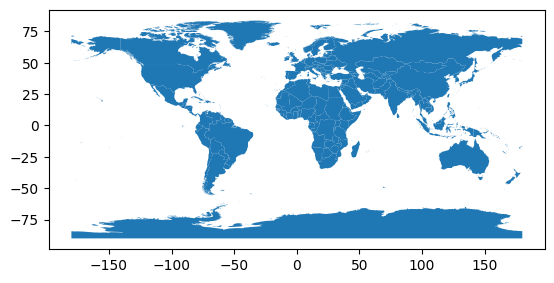

In [13]:
import geopandas as gpd
# get country data
url = "https://opendata.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1.geojson"
world = gpd.read_file(url)
world.plot()

In [133]:
#make sure the integers have removed all commas
casualties_dropped["Military deaths from all causes"] = casualties_dropped["Military deaths from all causes"].str.replace(',','')
casualties_dropped["Civilian deaths due to military activity and crimes against humanity"] = casualties_dropped["Civilian deaths due to military activity and crimes against humanity"].str.replace(',','')
casualties_dropped["Total deaths"] = casualties_dropped["Total deaths"].str.replace(',','')
casualties_dropped["Total population as of 1/1/1939"] = casualties_dropped["Total population as of 1/1/1939"].str.replace(',','')


In [134]:
#changing the title of the types of resources to their resource name
aircraft_added_each = aircraft_added_each.rename(columns={'Primary Role': 'aircraft'})
facilities_added_each = facilities_added_each.rename(columns={'Type': 'facilities'})
weapons_added_each = weapons_added_each.rename(columns={'Type': 'weapons'})

Below we merge all the datasets together and replace null values with 0

In [135]:
casualties_drop = pd.merge(casualties_dropped, aircraft_added_each, how='outer')
all = pd.merge(facilities_added_each, ships_added, how='outer')
all = pd.merge(all, weapons_added_each, how='outer')
all = pd.merge(all, vehicles_added, how='outer')
all["Country"] = all["Country"].apply(lambda x: x.replace('\xa0', ''))
all = pd.merge(all, casualties_drop, how='outer')
#all = all.rename(columns={'Country': 'Countries'})
casualties_dropped = all

In [136]:
import numpy as np
casualties_dropped = casualties_dropped.replace('', 0)
casualties_dropped = casualties_dropped.replace(np.nan, 0)
casualties_dropped.head(10)

,Country,facilities,ships,weapons,vehicles,Total population as of 1/1/1939,Military deaths from all causes,Civilian deaths due to military activity and crimes against humanity,Total deaths,Deaths as percentage of1939 population,aircraft
0,Australian New Guinea,12.0,0.0,0.0,0.0,0,0,0,0,0,0.0
1,Australian Papua,6.0,0.0,0.0,0.0,0,0,0,0,0,0.0
2,Austria,1.0,0.0,63.0,0.0,6653000,261000,123700,384700,5.782353825,0.0
3,Belgium,1.0,0.0,20.0,0.0,8387000,12000,76000,88000,1.049242876,0.0
4,British Western Pacific Territories,12.0,0.0,0.0,0.0,0,0,0,0,0,0.0
5,Burma,6.0,0.0,0.0,0.0,0,0,0,0,0,0.0
6,Canada,5.0,2.0,0.0,5.0,11587000,5300,1700,44800,0.3866402,2.0
7,China,224.0,10.0,13.0,0.0,517568000,3750000,8191000,20000000,3.864226536,18.0
8,Czechoslovakia,6.0,0.0,124.0,2.0,14612000,46000,320000,355000,2.429509992,7.0
9,Danzig,6.0,0.0,0.0,0.0,0,0,0,0,0,0.0


Here we ensure the world file Country column matches our merge data and we turn all strings into ints

In [137]:
world = world.rename(columns={'CNTRY_NAME': 'Country'})

In [138]:
casualties_dropped["Military deaths from all causes"] = casualties_dropped["Military deaths from all causes"].astype(int)
casualties_dropped["Deaths as percentage of1939 population"] = casualties_dropped["Deaths as percentage of1939 population"].astype(float)
casualties_dropped["Civilian deaths due to military activity and crimes against humanity"] = casualties_dropped["Civilian deaths due to military activity and crimes against humanity"].astype(int)
casualties_dropped["Total deaths"] = casualties_dropped["Total deaths"].astype(int)
casualties_dropped["Total population as of 1/1/1939"] = casualties_dropped["Total population as of 1/1/1939"].astype(int)
casualties_dropped["facilities"] = casualties_dropped["facilities"].astype(int)
casualties_dropped["ships"] = casualties_dropped["ships"].astype(int)
casualties_dropped["aircraft"] = casualties_dropped["aircraft"].astype(int)
casualties_dropped["weapons"] = casualties_dropped["weapons"].astype(int)
casualties_dropped["vehicles"] = casualties_dropped["vehicles"].astype(int)


Here we merge the shape file data with our own dataset

In [139]:
df_world= pd.merge(casualties_dropped, world, on='Country')
crs = {'init': 'epsg:4326'}
corona_gpd = gpd.GeoDataFrame(df_world, crs=crs, geometry='geometry')
corona_gpd.head()

C:\Users\jmcha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Country,facilities,ships,weapons,vehicles,Total population as of 1/1/1939,Military deaths from all causes,Civilian deaths due to military activity and crimes against humanity,Total deaths,Deaths as percentage of1939 population,aircraft,OBJECTID,geometry
0,Austria,1,0,63,0,6653000,261000,123700,384700,5.782354,0,13,"POLYGON ((10.47124 46.87135, 10.48821 46.93599..."
1,Belgium,1,0,20,0,8387000,12000,76000,88000,1.049243,0,20,"POLYGON ((6.39820 50.32317, 6.34972 50.31277, ..."
2,Canada,5,2,0,5,11587000,5300,1700,44800,0.386640,2,36,"MULTIPOLYGON (((-84.47945 77.29443, -84.46764 ..."
3,China,224,10,13,0,517568000,3750000,8191000,20000000,3.864227,18,42,"MULTIPOLYGON (((85.10332 28.31639, 85.11360 28..."
4,France,38,28,293,12,41680000,210000,390000,600000,1.439539,189,78,"MULTIPOLYGON (((6.24375 46.31551, 6.23000 46.3..."


Below maps out all our results using geo pandas

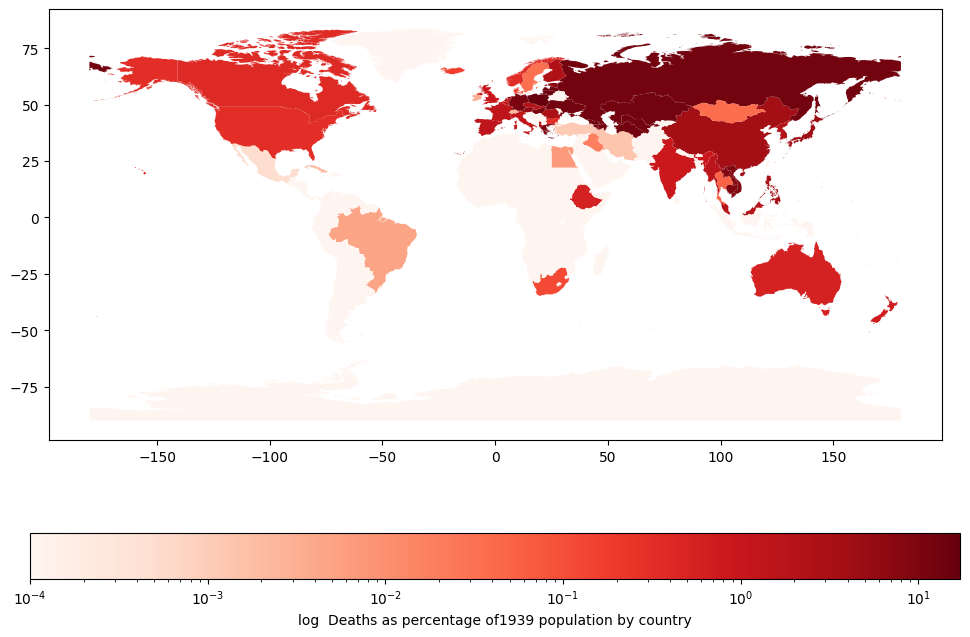

In [140]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

corona_gpd = corona_gpd.replace(0,0.0001)

f, ax = plt.subplots(1,1,figsize=(12,8))
vmin = corona_gpd['Deaths as percentage of1939 population'].min()
vmax = corona_gpd['Deaths as percentage of1939 population'].max()
ax = corona_gpd.plot(column="Deaths as percentage of1939 population", cmap='Reds',norm = colors.LogNorm(vmin=vmin, vmax=vmax),ax=ax, legend=True,legend_kwds={'label': "log  Deaths as percentage of1939 population by country",'orientation': "horizontal"})


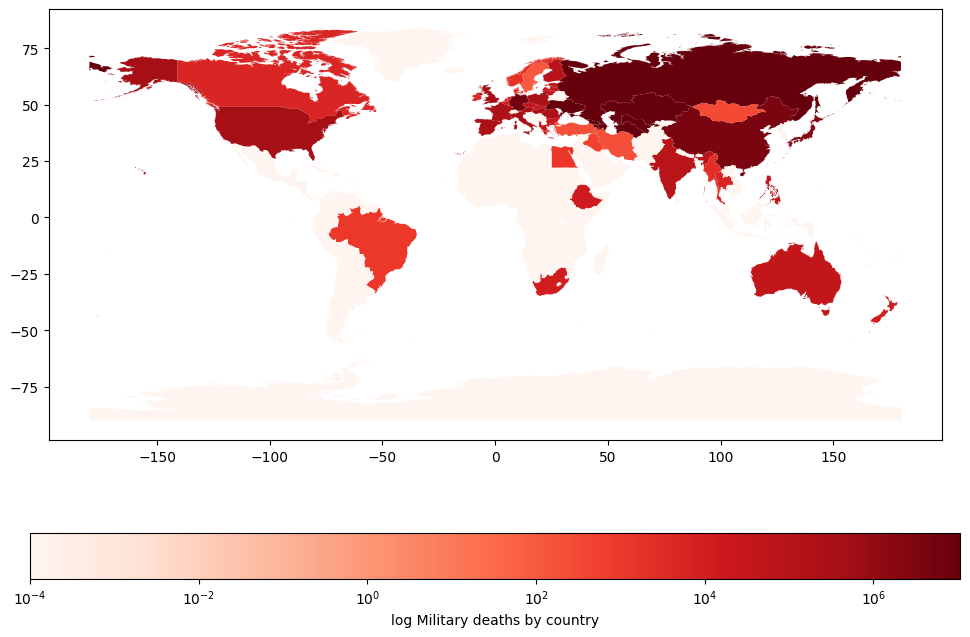

In [141]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

#corona_gpd = corona_gpd.replace(0,1)
f, ax = plt.subplots(1,1,figsize=(12,8))
vmin = corona_gpd['Military deaths from all causes'].min()
vmax = corona_gpd['Military deaths from all causes'].max()
ax = corona_gpd.plot(column="Military deaths from all causes", cmap='Reds',norm = colors.LogNorm(vmin=vmin, vmax=vmax),ax=ax, legend=True,legend_kwds={'label': "log Military deaths by country",'orientation': "horizontal"})

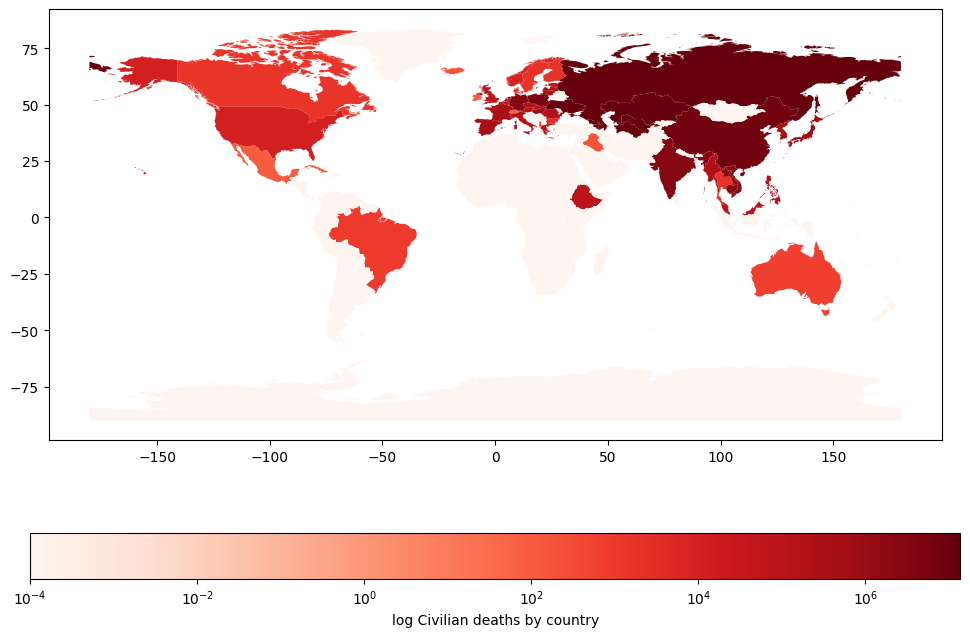

In [143]:
import matplotlib.pyplot as plt
#corona_gpd = corona_gpd.replace(0,1)
f, ax = plt.subplots(1,1,figsize=(12,8))
vmin = corona_gpd['Civilian deaths due to military activity and crimes against humanity'].min()
vmax = corona_gpd['Civilian deaths due to military activity and crimes against humanity'].max()
ax = corona_gpd.plot(column="Civilian deaths due to military activity and crimes against humanity", cmap='Reds',norm = colors.LogNorm(vmin=vmin, vmax=vmax),ax=ax, legend=True, legend_kwds={'label': "log Civilian deaths by country",'orientation': "horizontal"})


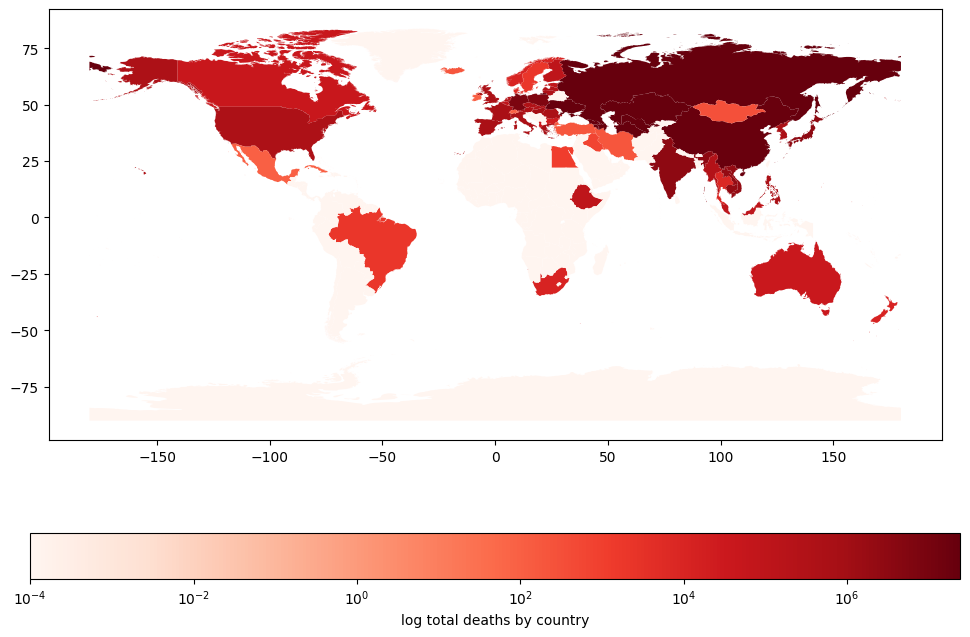

In [142]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1,1,figsize=(12,8))
#corona_gpd = corona_gpd.replace(0,1)

vmin = corona_gpd['Total deaths'].min()
vmax = corona_gpd['Total deaths'].max()
ax = corona_gpd.plot(column="Total deaths", cmap='Reds',norm = colors.LogNorm(vmin=vmin, vmax=vmax),ax=ax, legend=True,legend_kwds={'label': "log total deaths by country",'orientation': "horizontal"})


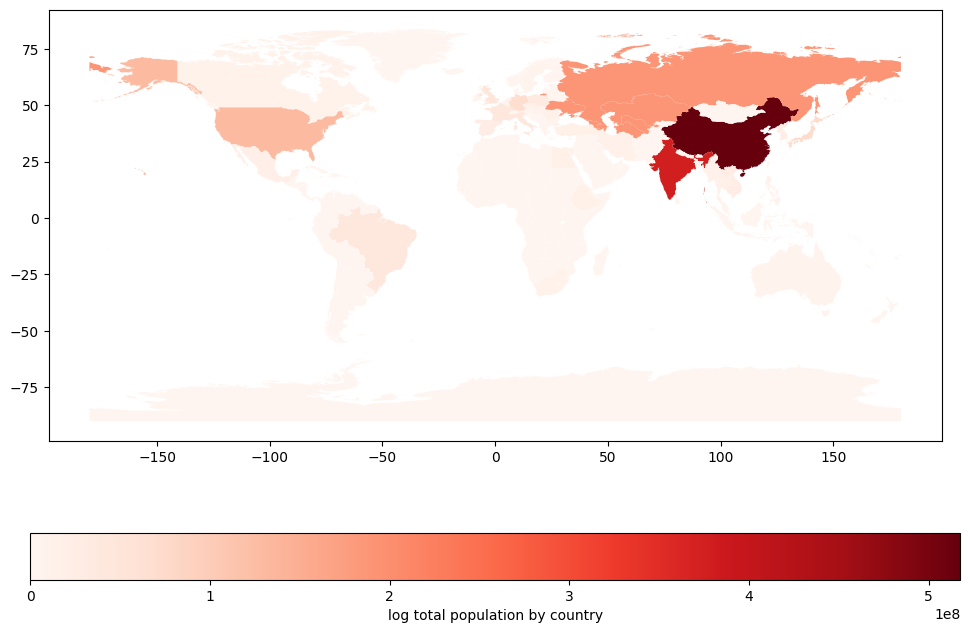

In [27]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1,1,figsize=(12,8))
#corona_gpd = corona_gpd.replace(0,1)
vmin = corona_gpd['Total population as of 1/1/1939'].min()
vmax = corona_gpd['Total population as of 1/1/1939'].max()
ax = corona_gpd.plot(column="Total population as of 1/1/1939", cmap='Reds',ax=ax, legend=True, legend_kwds={'label': "log total population by country",'orientation': "horizontal"})


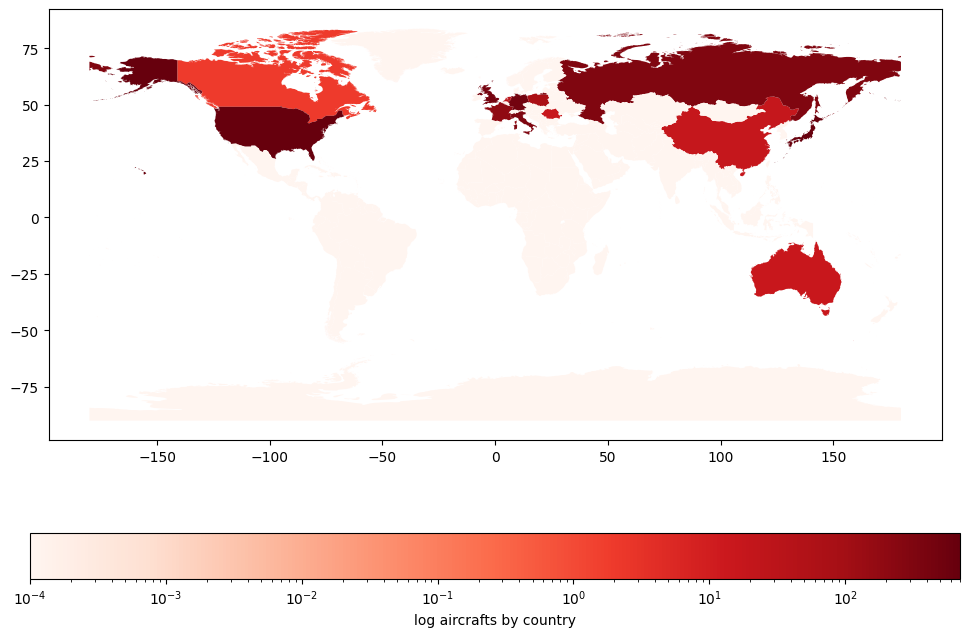

In [145]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1,1,figsize=(12,8))
#corona_gpd = corona_gpd.replace(0,0.1)
vmin = corona_gpd['aircraft'].min()
vmax = corona_gpd['aircraft'].max()
ax = corona_gpd.plot(column="aircraft", cmap='Reds',norm = colors.LogNorm(vmin=vmin, vmax=vmax),ax=ax, legend=True, legend_kwds={'label': "log aircrafts by country",'orientation': "horizontal"})

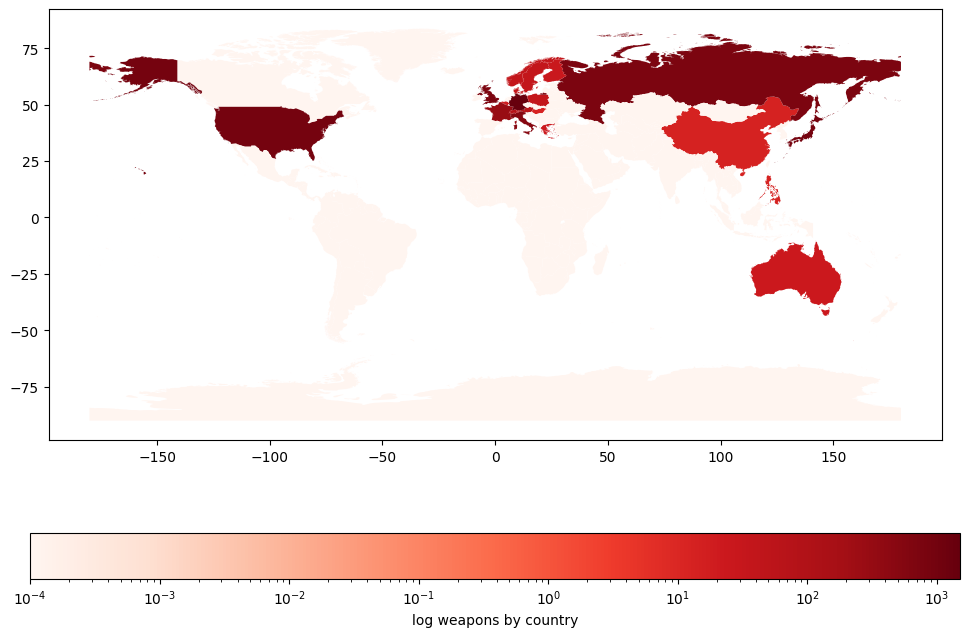

In [147]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1,1,figsize=(12,8))
#corona_gpd = corona_gpd.replace(0.0001,1)
vmin = corona_gpd['weapons'].min()
vmax = corona_gpd['weapons'].max()
ax = corona_gpd.plot(column="weapons", cmap='Reds',norm = colors.LogNorm(vmin=vmin, vmax=vmax),ax=ax, legend=True,legend_kwds={'label': "log weapons by country",'orientation': "horizontal"})

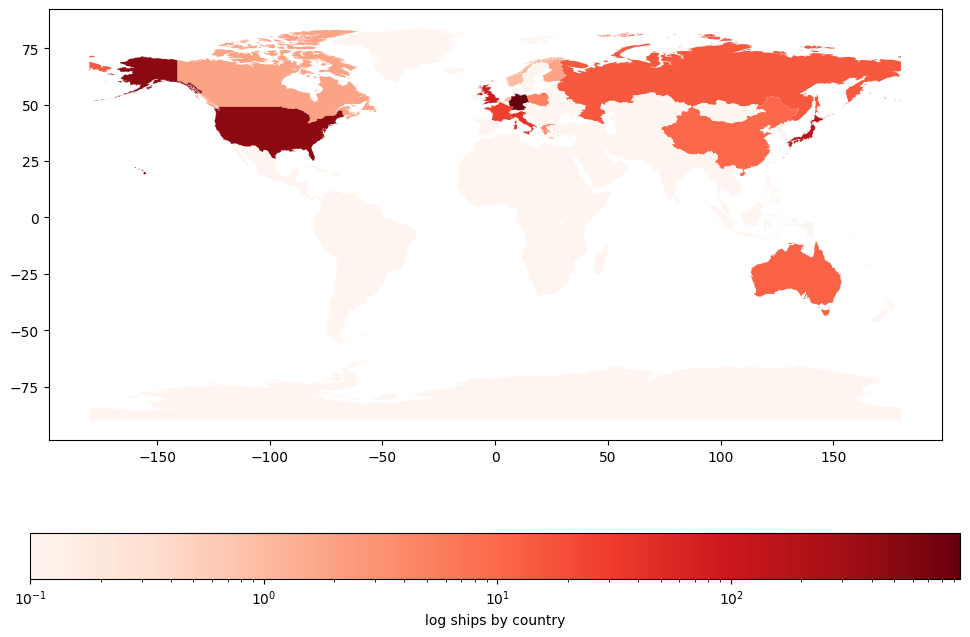

In [55]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1,1,figsize=(12,8))
vmin = corona_gpd['ships'].min()
vmax = corona_gpd['ships'].max()
ax = corona_gpd.plot(column="ships", cmap='Reds',norm = colors.LogNorm(vmin=vmin, vmax=vmax),ax=ax, legend=True,legend_kwds={'label': "log ships by country",'orientation': "horizontal"})

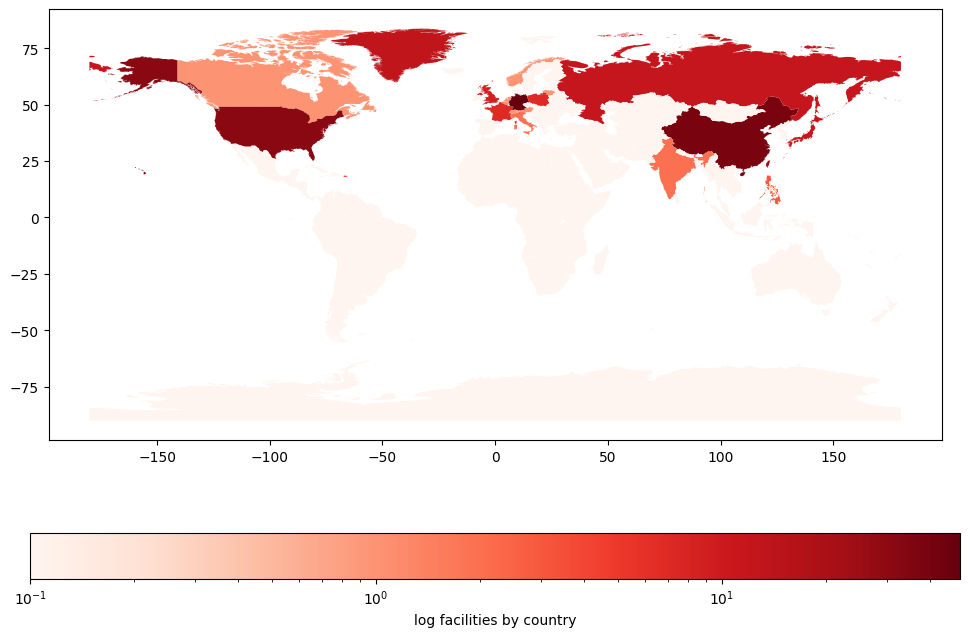

In [78]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1,1,figsize=(12,8))
vmin = corona_gpd['facilities'].min()
vmax = corona_gpd['facilities'].max()
ax = corona_gpd.plot(column="facilities", cmap='Reds',norm = colors.LogNorm(vmin=vmin, vmax=vmax),ax=ax, legend=True,legend_kwds={'label': "log facilities by country",'orientation': "horizontal"})

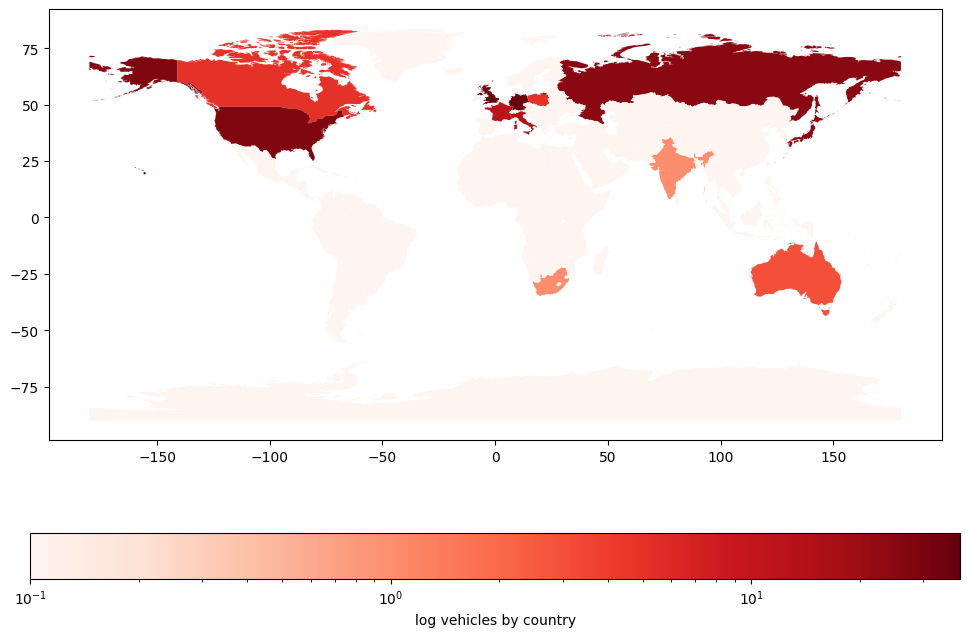

In [54]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1,1,figsize=(12,8))
corona_gpd = corona_gpd.replace(0.0001,0.1)
vmin = corona_gpd['vehicles'].min()
vmax = corona_gpd['vehicles'].max()
ax = corona_gpd.plot(column="vehicles", cmap='Reds',norm = colors.LogNorm(vmin=vmin, vmax=vmax),ax=ax, legend=True,legend_kwds={'label': "log vehicles by country",'orientation': "horizontal"})

C:\Users\jmcha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


[]

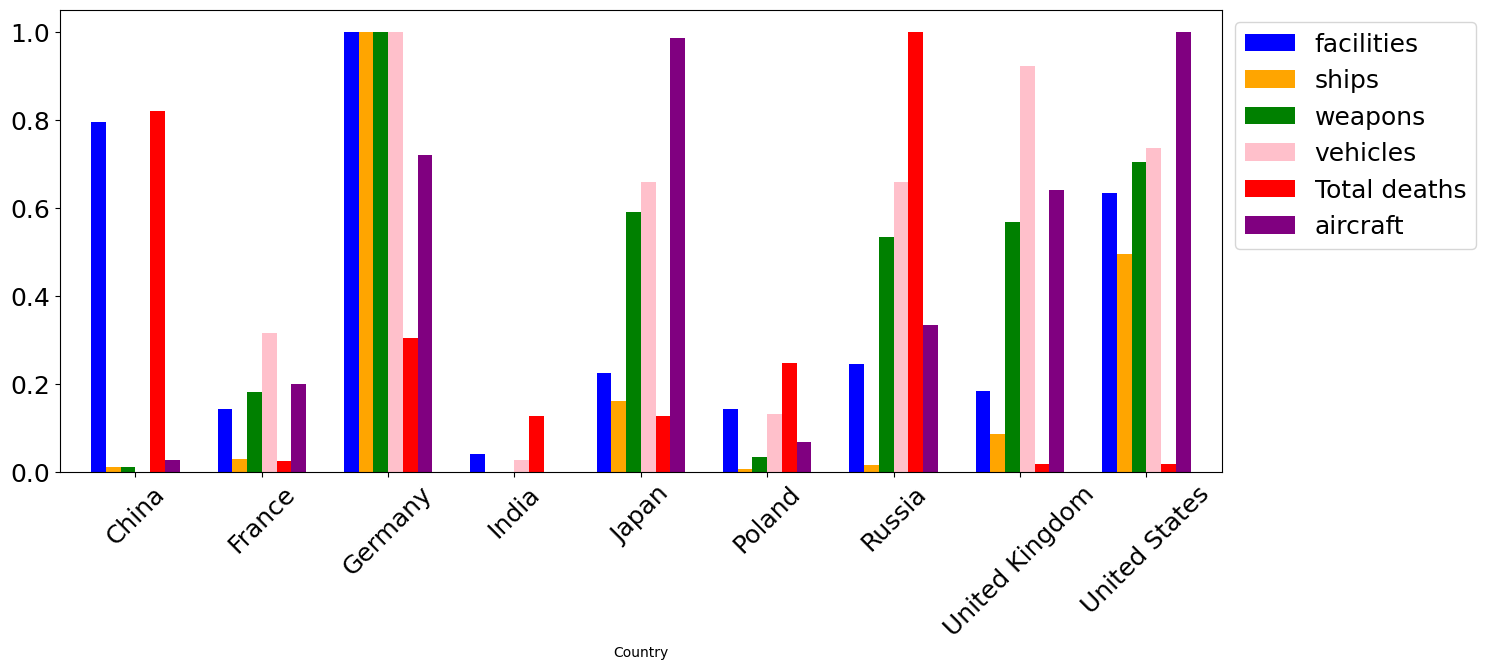

In [119]:
Countries = ["United States", "United Kingdom", "Russia","China", "Germany", "Japan", "France", "India","Poland"]
corona_gpd2 = corona_gpd[corona_gpd["Country"].isin(Countries)]
for column in corona_gpd2.columns[1:-1]:
    corona_gpd2[column] = corona_gpd2[column]  / corona_gpd2[column].abs().max()
corona_gpd2 = corona_gpd2.drop(columns = ["Total population as of 1/1/1939","Military deaths from all causes", "Deaths as percentage of1939 population","Civilian deaths due to military activity and crimes against humanity","OBJECTID"])

ax = corona_gpd2.plot.bar(x = "Country", color = ["blue","orange", "green", "pink", "red","purple","yellow"],figsize=(15, 6),width=0.7,rot=45,fontsize=18)
ax.legend(bbox_to_anchor=(1.0, 1.0),fontsize=18)
ax.plot()